# Create a bipartite network from scraped data

### Import libraries and packages

In [1]:
import numpy as np
import pandas as pd
import re
import csv

## 1. Create Network Data

The following code restructures the data obtained from scraping (PeaceTreaties notebook in the WebScraping repository) in order to use it for network analysis. In this case, I will create two nodelists and one edgelist from the data in order to generate a bipartite graph with treaties and countries as nodes.

Read the the scraped CSV file as a pandas dataframe.

In [2]:
new_treaties = pd.read_csv('new_treaties_rus.csv')

In [3]:
new_treaties

,title,sides,dates
0,Bündnis von Gmunden (verlesen: *Brunndenau),"Kaiser, Russland",1514 VIII 4
1,Waffenstillstand von Moskau,"Polen, Russland",1522 XII 25_1523 I 4
2,Präliminarvertrag von Krakau,"Polen, Russland",1523 II 22
3,Waffenstillstand von Nowgorod,"Russland, Schweden",1524 IV 3
4,Waffenstillstand von Nowgorod,"Russland, Schweden",1537 III 25_IV 4
...,...,...,...
95,Konvention über die bewaffnete Neutralität,"Russland, Schweden",1780 VII 21_VIII 1
96,Schiffahrtskonvention von St. Petersburg,"Portugal, Russland",1782 VII 13
97,Freundschafts- und Handelsvertrag von St. Pete...,"Dänemark, Russland",1782 X 8_19
98,Friedensvertrag von Versailles,"Frankreich, Großbritannien,...",1783 IX 3


One of the challenges with the original data structure is the fact that the *sides* column contains multiple entries. First transform the structure within the sides column.

In [4]:
sides_lists = new_treaties.sides.str.split(',')         # split strings into list
new_treaties.sides = sides_lists                        # replace strings with lists in the dataframe

In [5]:
sides_lists

0                [                   Kaiser,  Russland]
1                 [                   Polen,  Russland]
2                 [                   Polen,  Russland]
3              [                   Russland,  Schweden]
4              [                   Russland,  Schweden]
                            ...                        
95             [                   Russland,  Schweden]
96             [                   Portugal,  Russland]
97             [                   Dänemark,  Russland]
98    [                   Frankreich,  Großbritannie...
99    [                   Osmanisches Reich,  Russland]
Name: sides, Length: 100, dtype: object

### Add ids to the treaties
Every row in *new_treaties* corresponds to one treaty. Some of them have the same title but different dates.
Because I want to create a bipartite graph, I am adding alphanumerical ids.

In [6]:
new_treaties['Treaty_Id'] = new_treaties.index +1

In [7]:
new_treaties['IDLetter'] = 'T'

Concatenate the 2 columns, convert numbers to strings.

In [8]:
new_treaties['Treaty_ID'] = new_treaties["IDLetter"] + new_treaties["Treaty_Id"].astype(str)

Add a column for the node-type to distinguish the different nodes later by this column.

In [9]:
new_treaties['node_type'] = 'treaty'

In [10]:
new_treaties

,title,sides,dates,Treaty_Id,IDLetter,Treaty_ID,node_type
0,Bündnis von Gmunden (verlesen: *Brunndenau),"[ Kaiser, Russland]",1514 VIII 4,1,T,T1,treaty
1,Waffenstillstand von Moskau,"[ Polen, Russland]",1522 XII 25_1523 I 4,2,T,T2,treaty
2,Präliminarvertrag von Krakau,"[ Polen, Russland]",1523 II 22,3,T,T3,treaty
3,Waffenstillstand von Nowgorod,"[ Russland, Schweden]",1524 IV 3,4,T,T4,treaty
4,Waffenstillstand von Nowgorod,"[ Russland, Schweden]",1537 III 25_IV 4,5,T,T5,treaty
...,...,...,...,...,...,...,...
95,Konvention über die bewaffnete Neutralität,"[ Russland, Schweden]",1780 VII 21_VIII 1,96,T,T96,treaty
96,Schiffahrtskonvention von St. Petersburg,"[ Portugal, Russland]",1782 VII 13,97,T,T97,treaty
97,Freundschafts- und Handelsvertrag von St. Pete...,"[ Dänemark, Russland]",1782 X 8_19,98,T,T98,treaty
98,Friedensvertrag von Versailles,"[ Frankreich, Großbritannie...",1783 IX 3,99,T,T99,treaty


### Deal with dates
The dates are in an inconvenient format that is difficult to process. The month is represented in Roman numerals, which in itself is not a problem (they can be converted into a regular date format), but some dates are given as a time-range, rather than one single date (for example: 1663 VII 24_VIII 3). In this example, I will just export the year to a new column to be able to use it later. 

In [11]:
# regex definition get year from the data
def get_year(file):
  year_match = re.findall(r'(\d{4})',file)
  return year_match[0]

Add year data to a new column

In [12]:
new_treaties['year'] = new_treaties['dates'].apply(lambda x: get_year(x))

In [13]:
new_treaties.sort_values('year') #check the new dataframe and sort by year column

,title,sides,dates,Treaty_Id,IDLetter,Treaty_ID,node_type,year
0,Bündnis von Gmunden (verlesen: *Brunndenau),"[ Kaiser, Russland]",1514 VIII 4,1,T,T1,treaty,1514
1,Waffenstillstand von Moskau,"[ Polen, Russland]",1522 XII 25_1523 I 4,2,T,T2,treaty,1522
2,Präliminarvertrag von Krakau,"[ Polen, Russland]",1523 II 22,3,T,T3,treaty,1523
3,Waffenstillstand von Nowgorod,"[ Russland, Schweden]",1524 IV 3,4,T,T4,treaty,1524
4,Waffenstillstand von Nowgorod,"[ Russland, Schweden]",1537 III 25_IV 4,5,T,T5,treaty,1537
...,...,...,...,...,...,...,...,...
95,Konvention über die bewaffnete Neutralität,"[ Russland, Schweden]",1780 VII 21_VIII 1,96,T,T96,treaty,1780
96,Schiffahrtskonvention von St. Petersburg,"[ Portugal, Russland]",1782 VII 13,97,T,T97,treaty,1782
97,Freundschafts- und Handelsvertrag von St. Pete...,"[ Dänemark, Russland]",1782 X 8_19,98,T,T98,treaty,1782
98,Friedensvertrag von Versailles,"[ Frankreich, Großbritannie...",1783 IX 3,99,T,T99,treaty,1783


### Add start-date and end-date for visualizing a dynamic network (optional)
From sorting the values by year (above) you should get the date of the newest treaty in the database (1784 for the Russian selesction). For simplicity's sake, I will use the following year (1785) as an end-date for all the treaties.

In [14]:
new_treaties['start_date'] = new_treaties['year'].astype(int)

In [15]:
new_treaties['end_date'] = 1785

In [52]:
#new_treaties.dtypes # check datatypes

### De-normalize the database and create a basis for a future edge list.

The explode method worked best to create a full list of the sides. It duplicates title and dates entries.

In [16]:
basic_edgelist = new_treaties.explode('sides') # explode based on the sides column

In [17]:
basic_edgelist

,title,sides,dates,Treaty_Id,IDLetter,Treaty_ID,node_type,year,start_date,end_date
0,Bündnis von Gmunden (verlesen: *Brunndenau),Kaiser,1514 VIII 4,1,T,T1,treaty,1514,1514,1785
0,Bündnis von Gmunden (verlesen: *Brunndenau),Russland,1514 VIII 4,1,T,T1,treaty,1514,1514,1785
1,Waffenstillstand von Moskau,Polen,1522 XII 25_1523 I 4,2,T,T2,treaty,1522,1522,1785
1,Waffenstillstand von Moskau,Russland,1522 XII 25_1523 I 4,2,T,T2,treaty,1522,1522,1785
2,Präliminarvertrag von Krakau,Polen,1523 II 22,3,T,T3,treaty,1523,1523,1785
...,...,...,...,...,...,...,...,...,...,...
98,Friedensvertrag von Versailles,Großbritannien,1783 IX 3,99,T,T99,treaty,1783,1783,1785
98,Friedensvertrag von Versailles,Reich,1783 IX 3,99,T,T99,treaty,1783,1783,1785
98,Friedensvertrag von Versailles,Russland,1783 IX 3,99,T,T99,treaty,1783,1783,1785
99,Friedensvertrag von Konstantinopel (Beta-Version),Osmanisches Reich,1784 I 08 / 1198 AH,100,T,T100,treaty,1784,1784,1785


Remove whitespace around strings in sides. Avoids false duplicates.

In [18]:
basic_edgelist.sides = basic_edgelist.sides.str.strip()

This dataframe will later serve as the basis for the edgelist, but first I will extract the nodelists and add Ids.

### Extract unique nodes (countries)
Drop all duplicate rows, keep only the rows with the earliest year.

In [19]:
country_nodes = basic_edgelist.sort_values('year').drop_duplicates('sides',keep='first').reset_index(drop=True) #keep='first' is default, just for clarifyng; 'last' is the opposite option

Note: Resetting index and (drop=true) is important, otherwise the index from the previous dataframe will be kept.

Sort them alphabetically:

In [20]:
country_nodes.sort_values('sides')

,title,sides,dates,Treaty_Id,IDLetter,Treaty_ID,node_type,year,start_date,end_date
8,Angriffs- und Schutzbündnis von Kopenhagen,Dänemark,1709 X 11_22,44,T,T44,treaty,1709,1709,1785
13,Allianzvertrag von Amsterdam,Frankreich,1717 VIII 15,59,T,T59,treaty,1717,1717,1785
15,Konvention von St. Petersburg,Generalstaaten,1747 XI 19,78,T,T78,treaty,1747,1747,1785
17,Friedensvertrag von Versailles,Großbritannien,1783 IX 3,99,T,T99,treaty,1783,1783,1785
9,Freundschaftsvertrag von Hannover,Hannover,1710 VII 3,47,T,T47,treaty,1710,1710,1785
0,Bündnis von Gmunden (verlesen: *Brunndenau),Kaiser,1514 VIII 4,1,T,T1,treaty,1514,1514,1785
10,Heiratsvertrag von St. Petersburg,Livland (Herzogtum),1710 VI 10_21,46,T,T46,treaty,1710,1710,1785
12,Bündnisvertrag von Danzig,Mecklenburg - Schwerin,1716 IV 8_19,58,T,T58,treaty,1716,1716,1785
6,Waffenstillstand von Karlowitz (Beta-Version),Osmanisches Reich,1698 XII 25,32,T,T32,treaty,1698,1698,1785
2,Waffenstillstand von Moskau,Polen,1522 XII 25_1523 I 4,2,T,T2,treaty,1522,1522,1785


Extract relevant columns:

In [21]:
Country_nodes = country_nodes.loc[:, ['sides', 'year', 'start_date', 'end_date']]

In [22]:
Country_nodes

,sides,year,start_date,end_date
0,Kaiser,1514,1514,1785
1,Russland,1514,1514,1785
2,Polen,1522,1522,1785
3,Schweden,1524,1524,1785
4,Siebenbürgen,1623,1623,1785
5,Venedig,1697,1697,1785
6,Osmanisches Reich,1698,1698,1785
7,Sachsen / Polen,1699,1699,1785
8,Dänemark,1709,1709,1785
9,Hannover,1710,1710,1785


### Add ids to the country nodelist

In [23]:
Country_nodes['Side_Id'] = Country_nodes.index +1 # this will only work as expected if the index has been reset before.

In [24]:
Country_nodes['IDLetter'] = 'C'

Concatenate the 2 columns, convert numbers to strings.

In [25]:
Country_nodes['Side_ID'] = Country_nodes["IDLetter"] + Country_nodes["Side_Id"].astype(str)

In [26]:
Country_nodes['node_type'] = 'country'

In [27]:
Country_nodes

,sides,year,start_date,end_date,Side_Id,IDLetter,Side_ID,node_type
0,Kaiser,1514,1514,1785,1,C,C1,country
1,Russland,1514,1514,1785,2,C,C2,country
2,Polen,1522,1522,1785,3,C,C3,country
3,Schweden,1524,1524,1785,4,C,C4,country
4,Siebenbürgen,1623,1623,1785,5,C,C5,country
5,Venedig,1697,1697,1785,6,C,C6,country
6,Osmanisches Reich,1698,1698,1785,7,C,C7,country
7,Sachsen / Polen,1699,1699,1785,8,C,C8,country
8,Dänemark,1709,1709,1785,9,C,C9,country
9,Hannover,1710,1710,1785,10,C,C10,country


Select only those columns that you need for the nodelist:

In [28]:
Country_nodes = Country_nodes.loc[:, ["Side_ID", "sides", 'Side_Id', 'node_type', 'start_date', 'end_date']]

In [29]:
Country_nodes #preview of country nodes

,Side_ID,sides,Side_Id,node_type,start_date,end_date
0,C1,Kaiser,1,country,1514,1785
1,C2,Russland,2,country,1514,1785
2,C3,Polen,3,country,1522,1785
3,C4,Schweden,4,country,1524,1785
4,C5,Siebenbürgen,5,country,1623,1785
5,C6,Venedig,6,country,1697,1785
6,C7,Osmanisches Reich,7,country,1698,1785
7,C8,Sachsen / Polen,8,country,1699,1785
8,C9,Dänemark,9,country,1709,1785
9,C10,Hannover,10,country,1710,1785


In [59]:
Country_nodes.dtypes # check datatypes

Side_ID       object
sides         object
Side_Id        int64
node_type     object
start_date     int64
end_date       int64
dtype: object

Add new country row:

In [ ]:
#template for a new country row:
# new_country_row = {'Side_ID':'', 'sides':'', 'Side_Id':'12, 'node_type':'country', 'start_date':'12', 'end_date':1785}

In [60]:
new_country_row = {'Side_ID':'C19', 'sides':'China', 'Side_Id':19, 'node_type':'country', 'start_date':1689, 'end_date':1785}

In [61]:
Country_nodes = Country_nodes.append(new_country_row, ignore_index=True)

In [62]:
Country_nodes

,Side_ID,sides,Side_Id,node_type,start_date,end_date
0,C1,Kaiser,1,country,1514,1785
1,C2,Russland,2,country,1514,1785
2,C3,Polen,3,country,1522,1785
3,C4,Schweden,4,country,1524,1785
4,C5,Siebenbürgen,5,country,1623,1785
5,C6,Venedig,6,country,1697,1785
6,C7,Osmanisches Reich,7,country,1698,1785
7,C8,Sachsen / Polen,8,country,1699,1785
8,C9,Dänemark,9,country,1709,1785
9,C10,Hannover,10,country,1710,1785


Export country nodes to a CSV file and drop the original index from the dataframe:

In [30]:
#Country_nodes.to_csv('Country_nodes_rus.csv', index= False)

### Extract unique nodes (treaties)

In [31]:
Treaty_nodes = new_treaties.loc[:, ['title', 'dates', "Treaty_ID", 'Treaty_Id', 'node_type', 'start_date', 'end_date']]

Add year column to the Treaty nodes table (for viz).

In [32]:
Treaty_nodes['year'] = Treaty_nodes['start_date']

In [33]:
Treaty_nodes

,title,dates,Treaty_ID,Treaty_Id,node_type,start_date,end_date,year
0,Bündnis von Gmunden (verlesen: *Brunndenau),1514 VIII 4,T1,1,treaty,1514,1785,1514
1,Waffenstillstand von Moskau,1522 XII 25_1523 I 4,T2,2,treaty,1522,1785,1522
2,Präliminarvertrag von Krakau,1523 II 22,T3,3,treaty,1523,1785,1523
3,Waffenstillstand von Nowgorod,1524 IV 3,T4,4,treaty,1524,1785,1524
4,Waffenstillstand von Nowgorod,1537 III 25_IV 4,T5,5,treaty,1537,1785,1537
...,...,...,...,...,...,...,...,...
95,Konvention über die bewaffnete Neutralität,1780 VII 21_VIII 1,T96,96,treaty,1780,1785,1780
96,Schiffahrtskonvention von St. Petersburg,1782 VII 13,T97,97,treaty,1782,1785,1782
97,Freundschafts- und Handelsvertrag von St. Pete...,1782 X 8_19,T98,98,treaty,1782,1785,1782
98,Friedensvertrag von Versailles,1783 IX 3,T99,99,treaty,1783,1785,1783


In [55]:
Treaty_nodes.dtypes # check datatypes

title         object
dates         object
Treaty_ID     object
Treaty_Id      int64
node_type     object
start_date     int64
end_date       int64
year           int64
dtype: object

Add a new row for Chinese treaties and others...

In [ ]:
#template for a new row:
# new_row = {'title':'', 'dates':'', 'Treaty_ID':'TX', 'Treaty_Id':12, 'node_type':'treaty', 'start_date':'12', 'end_date':1785, 'year': 12}

In [56]:
new_row = {'title':'Vertrag von Nertschinsk', 'dates':'1689', 'Treaty_ID':'T101', 'Treaty_Id':101, 'node_type':'treaty', 'start_date':1689, 'end_date':1785, 'year': 1689} 

Append the new row:

In [57]:
Treaty_nodes = Treaty_nodes.append(new_row, ignore_index=True)

In [58]:
Treaty_nodes

,title,dates,Treaty_ID,Treaty_Id,node_type,start_date,end_date,year
0,Bündnis von Gmunden (verlesen: *Brunndenau),1514 VIII 4,T1,1,treaty,1514,1785,1514
1,Waffenstillstand von Moskau,1522 XII 25_1523 I 4,T2,2,treaty,1522,1785,1522
2,Präliminarvertrag von Krakau,1523 II 22,T3,3,treaty,1523,1785,1523
3,Waffenstillstand von Nowgorod,1524 IV 3,T4,4,treaty,1524,1785,1524
4,Waffenstillstand von Nowgorod,1537 III 25_IV 4,T5,5,treaty,1537,1785,1537
...,...,...,...,...,...,...,...,...
96,Schiffahrtskonvention von St. Petersburg,1782 VII 13,T97,97,treaty,1782,1785,1782
97,Freundschafts- und Handelsvertrag von St. Pete...,1782 X 8_19,T98,98,treaty,1782,1785,1782
98,Friedensvertrag von Versailles,1783 IX 3,T99,99,treaty,1783,1785,1783
99,Friedensvertrag von Konstantinopel (Beta-Version),1784 I 08 / 1198 AH,T100,100,treaty,1784,1785,1784


Export treaty nodes to CSV

In [34]:
#Treaty_nodes.to_csv('Treaty_nodes_rus.csv', index= False)

### Create the edgelist
Now add the country ids to edgelist based on the sides column.

In [63]:
compl_edgelist = pd.merge(basic_edgelist, Country_nodes[['sides','Side_ID']], on='sides', how='left')

In [64]:
compl_edgelist

,title,sides,dates,Treaty_Id,IDLetter,Treaty_ID,node_type,year,start_date,end_date,Side_ID
0,Bündnis von Gmunden (verlesen: *Brunndenau),Kaiser,1514 VIII 4,1,T,T1,treaty,1514,1514,1785,C1
1,Bündnis von Gmunden (verlesen: *Brunndenau),Russland,1514 VIII 4,1,T,T1,treaty,1514,1514,1785,C2
2,Waffenstillstand von Moskau,Polen,1522 XII 25_1523 I 4,2,T,T2,treaty,1522,1522,1785,C3
3,Waffenstillstand von Moskau,Russland,1522 XII 25_1523 I 4,2,T,T2,treaty,1522,1522,1785,C2
4,Präliminarvertrag von Krakau,Polen,1523 II 22,3,T,T3,treaty,1523,1523,1785,C3
...,...,...,...,...,...,...,...,...,...,...,...
196,Friedensvertrag von Versailles,Großbritannien,1783 IX 3,99,T,T99,treaty,1783,1783,1785,C18
197,Friedensvertrag von Versailles,Reich,1783 IX 3,99,T,T99,treaty,1783,1783,1785,C15
198,Friedensvertrag von Versailles,Russland,1783 IX 3,99,T,T99,treaty,1783,1783,1785,C2
199,Friedensvertrag von Konstantinopel (Beta-Version),Osmanisches Reich,1784 I 08 / 1198 AH,100,T,T100,treaty,1784,1784,1785,C7


Select relevant columns for edgelist.

In [65]:
Treaty_edges = compl_edgelist.loc[:, ["Treaty_ID", "Side_ID", 'dates', 'start_date', 'end_date']]

In [66]:
Treaty_edges

,Treaty_ID,Side_ID,dates,start_date,end_date
0,T1,C1,1514 VIII 4,1514,1785
1,T1,C2,1514 VIII 4,1514,1785
2,T2,C3,1522 XII 25_1523 I 4,1522,1785
3,T2,C2,1522 XII 25_1523 I 4,1522,1785
4,T3,C3,1523 II 22,1523,1785
...,...,...,...,...,...
196,T99,C18,1783 IX 3,1783,1785
197,T99,C15,1783 IX 3,1783,1785
198,T99,C2,1783 IX 3,1783,1785
199,T100,C7,1784 I 08 / 1198 AH,1784,1785


In [77]:
Treaty_edges.dtypes

Treaty_ID     object
Side_ID       object
dates         object
start_date     int64
end_date       int64
dtype: object

Add new edge rows

In [78]:
new_edge_row1 = {"Treaty_ID":'T101', 'Side_ID':'C2', 'dates':'1689', 'start_date':1689, 'end_date':1785}

In [79]:
new_edge_row2 = {"Treaty_ID":'T101', "Side_ID":'C19', 'dates':'1689', 'start_date':1689, 'end_date':1785}

In [82]:
Treaty_edges = Treaty_edges.append(new_edge_row1, ignore_index=True)

In [83]:
Treaty_edges = Treaty_edges.append(new_edge_row2, ignore_index=True)

In [84]:
Treaty_edges

,Treaty_ID,Side_ID,dates,start_date,end_date
0,T1,C1,1514 VIII 4,1514,1785
1,T1,C2,1514 VIII 4,1514,1785
2,T2,C3,1522 XII 25_1523 I 4,1522,1785
3,T2,C2,1522 XII 25_1523 I 4,1522,1785
4,T3,C3,1523 II 22,1523,1785
...,...,...,...,...,...
198,T99,C2,1783 IX 3,1783,1785
199,T100,C7,1784 I 08 / 1198 AH,1784,1785
200,T100,C2,1784 I 08 / 1198 AH,1784,1785
201,T101,C2,1689,1689,1785


Export final edgelist to CSV

In [67]:
#Treaty_edges.to_csv('Treaty_edges_rus.csv', index= False)

## 2. Create Network from Data

Import network libraries and packages

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

### Import data
Import the 2 node-lists with pandas and indicate that the index should be the id.

In [86]:
nodes1 = Country_nodes.set_index('Side_ID').to_dict('index').items() #set the index that is used in the edges list to add the nodes

In [87]:
nodes2 = Treaty_nodes.set_index('Treaty_ID').to_dict('index').items()

Import the edge list. The T-ids refer to the treaties, the C-ids refer to the countries.

In [88]:
edgelist = Treaty_edges

### Create an undirected Graph from the edgelist

Map source and target and generate graph.

In [89]:
B = nx.from_pandas_edgelist(edgelist, source="Treaty_ID", target="Side_ID", edge_attr=True, create_using=nx.Graph())

Add nodes and mark as belonging to respective node-set.

In [90]:
B.add_nodes_from(nodes1, bipartite=0) #countries
B.add_nodes_from(nodes2, bipartite=1) #treaties

Check if graph is really bipartite:

In [91]:
print(bipartite.is_bipartite(B))

True


Get basic stats info on the graph.

In [92]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 120
Number of edges: 203
Average degree:   3.3833


Color the two node-sets.

In [93]:
color_dict = {0:'orange',1:'red'} #sets colors as X for 0 and Y for 1. 

In [94]:
color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')] #creates a list that follows the same order in node list

Draw network with networkX draw having coloured nodes.

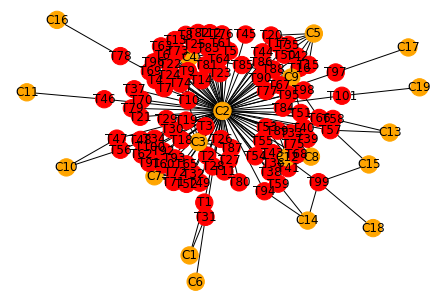

In [95]:
nx.draw(B, with_labels=True, node_color=color_list)

### Convert the graph data to JSON for vizualization in JavaScript

In [98]:
from networkx.readwrite import json_graph
import json

Use node_link_data format.

In [99]:
treatiesBi = json_graph.node_link_data(B)

Make sure the encoding is correct and export as json file.

In [100]:
with open('treatiesBi.json', 'w', encoding='utf-8') as f:
    json.dump(treatiesBi, f, ensure_ascii=False, indent=4)